<a href="https://colab.research.google.com/github/akshaythampan/Exploring-IMDb/blob/main/Exploring_IMDb_Analyzing_Correlations_in_Film_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [235]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import re

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("movies.csv")

# Display the first few rows of the DataFrame
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [236]:
# Get the column names of the DataFrame
column_names = df.columns

# Display the column names
column_names

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [237]:
# Check for null values in the entire DataFrame
null_values = df.isnull()

# Check if any null values exist in the DataFrame
has_null_values = null_values.any().any()

# Display the result
if has_null_values:
    print("The dataset contains null values.")
else:
    print("The dataset does not contain any null values.")

The dataset contains null values.


In [238]:
# Remove rows containing any null values
df = df.dropna()


In [239]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [240]:
# Extract the year from the "Released" column using regular expressions
df['Released_Year'] = df['released'].str.extract(r'(\d{4})')

# Check if the "year" column matches the "Released_Year" column
df['Match'] = df['year'] == df['Released_Year']

# Display the rows where there is a match
matching_rows = df[df['Match']]
matching_rows[['year', 'released', 'Match']]

# Count the number of True values in the "Match" column
num_matches = df['Match'].sum()

# Display the number of matches
print(f"Number of matches: {num_matches}")


Number of matches: 0


In [241]:
# Extract the year from the "released" column using regular expressions
df['released_year'] = df['released'].str.extract(r'(\d{4})')

# Convert the extracted year to numeric
df['released_year'] = df['released_year'].astype(float)

# Remove rows where the "year" column does not match the "released_year" column
df = df[df['year'] == df['released_year']]

# Drop the temporary "released_year" column
df = df.drop(columns=['released_year'])

# Display the DataFrame with matching rows
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Released_Year,Match
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980,False
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980,False
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980,False
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980,False
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,2020,False
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,2020,False
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,2020,False
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,2020,False


In [242]:
# Use regular expressions to remove the decimal part
df['year'] = df['year'].astype(str).apply(lambda x: re.sub(r'\.0$', '', x))

# Display the cleaned DataFrame
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Released_Year,Match
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980,False
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980,False
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980,False
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980,False
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980,False


In [243]:
df.dtypes

name              object
rating            object
genre             object
year              object
released          object
score            float64
votes            float64
director          object
writer            object
star              object
country           object
budget           float64
gross            float64
company           object
runtime          float64
Released_Year     object
Match               bool
dtype: object

In [244]:
# Specify the column name you want to change the data type of
column_to_convert = 'year'

# Use the astype() method to change the data type to float64
df[column_to_convert] = df[column_to_convert].astype(float)


In [245]:
# Calculate the correlation matrix for all columns
correlation_matrix = df.corr()

# Display the correlation matrix
correlation_matrix


<ipython-input-245-43d3386372f6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,year,score,votes,budget,gross,runtime,Match
year,1.000000,0.056629,0.212767,0.351585,0.291245,0.089339,NaN
score,0.056629,1.000000,0.493084,0.109774,0.253132,0.417857,NaN
votes,0.212767,0.493084,1.000000,0.448118,0.620142,0.364126,NaN
budget,0.351585,0.109774,0.448118,1.000000,0.739160,0.339337,NaN
gross,0.291245,0.253132,0.620142,0.739160,1.000000,0.295927,NaN
runtime,0.089339,0.417857,0.364126,0.339337,0.295927,1.000000,NaN
Match,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
# Count the number of unique values in the "company" column
company_count = df['company'].nunique()

# Display the number of unique values
print("Number of unique companies:", company_count)


Number of unique companies: 1200


In [247]:
# Use value_counts() to get the count of each company name
company_counts = df['company'].value_counts()

# Display the unique company names and their counts
print(company_counts)


Universal Pictures                     312
Warner Bros.                           289
Columbia Pictures                      287
Paramount Pictures                     274
Twentieth Century Fox                  206
                                      ... 
Centropolis Film Productions             1
Mann/Caan Productions                    1
Nimbus Film Productions                  1
FGM Entertainment                        1
Beijing Diqi Yinxiang Entertainment      1
Name: company, Length: 1200, dtype: int64


In [248]:
# Set the diagonal elements of the correlation matrix to NaN
np.fill_diagonal(correlation_matrix.values, np.nan)

# Find the top 5 unique correlation pairs
unique_pairs = (correlation_matrix.unstack().sort_values(ascending=False)
                .drop_duplicates().head(5))

print(unique_pairs)

gross    budget    0.739160
         votes     0.620142
score    votes     0.493084
budget   votes     0.448118
runtime  score     0.417857
dtype: float64


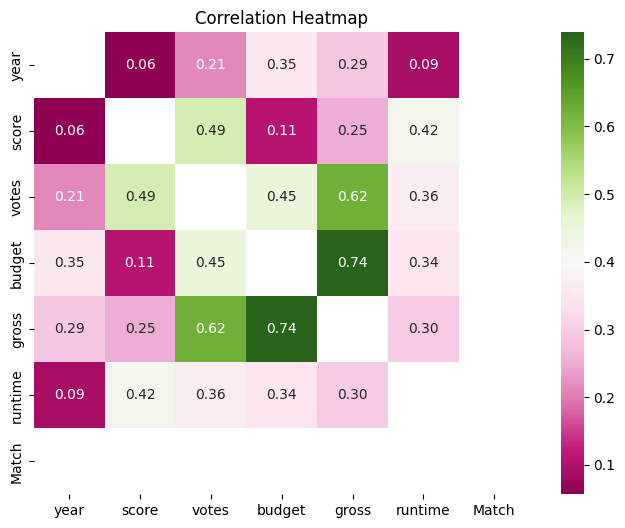

In [249]:
# Set the diagonal elements of the correlation matrix to NaN
np.fill_diagonal(correlation_matrix.values, np.nan)

# Find the top 5 unique correlation pairs
unique_pairs = (correlation_matrix.unstack().sort_values(ascending=False)
                .drop_duplicates().head(5))

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', fmt=".2f", cbar=True)

# Show the heatmap
plt.title('Correlation Heatmap')
plt.show()

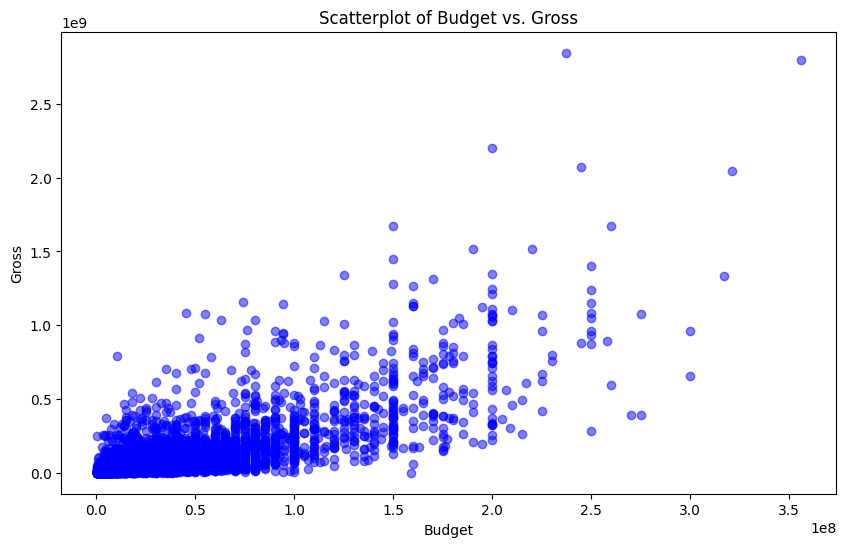

In [250]:
# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['gross'], alpha=0.5, color='blue')

# Set labels and title
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Scatterplot of Budget vs. Gross')

# Show the plot
plt.show()

In [251]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Released_Year,Match
0,The Shining,R,Drama,1980.0,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980,False
1,The Blue Lagoon,R,Adventure,1980.0,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980,False
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980.0,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980,False
3,Airplane!,PG,Comedy,1980.0,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980,False
4,Caddyshack,R,Comedy,1980.0,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980,False


In [252]:
# Define a threshold for classifying hits
gross_threshold = 2 * df['budget']

# Create a binary target variable based on the threshold
df['hit_or_flop'] = (df['gross'] >= gross_threshold).astype(int)

# Display the first few rows of the DataFrame with the new target variable
print(df[['gross', 'budget', 'hit_or_flop']].head())


         gross      budget  hit_or_flop
0   46998772.0  19000000.0            1
1   58853106.0   4500000.0            1
2  538375067.0  18000000.0            1
3   83453539.0   3500000.0            1
4   39846344.0   6000000.0            1


In [253]:
df_numerised = df.copy()

for column_name in df_numerised:
  if (df_numerised[column_name].dtype== 'object'):
    df_numerised[column_name]=df_numerised[column_name].astype('category')
    df_numerised[column_name]=df_numerised[column_name].cat.codes


In [254]:
df_numerised

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Released_Year,Match,hit_or_flop
0,4068,6,6,1980.0,1178,8.4,927000.0,1625,2495,620,42,19000000.0,46998772.0,1158,146.0,0,False,1
1,3410,6,1,1980.0,1011,5.8,65000.0,1430,1020,197,43,4500000.0,58853106.0,368,104.0,0,False,1
2,3152,4,0,1980.0,1229,8.7,1200000.0,682,1616,1029,43,18000000.0,538375067.0,779,124.0,0,False,1
3,179,4,4,1980.0,1011,7.7,221000.0,802,1243,1317,43,3500000.0,83453539.0,910,88.0,0,False,1
4,634,6,4,1980.0,1053,7.3,108000.0,649,308,246,43,6000000.0,39846344.0,889,98.0,0,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,365,6,0,2020.0,836,6.6,140000.0,13,2109,1615,43,90000000.0,426505244.0,368,124.0,40,False,1
7649,3081,4,0,2020.0,675,6.5,102000.0,770,2037,135,43,85000000.0,319715683.0,910,99.0,40,False,1
7650,994,4,1,2020.0,836,5.6,53000.0,1637,2491,1313,43,175000000.0,245487753.0,1137,101.0,40,False,0
7651,3450,4,1,2020.0,716,6.8,42000.0,268,1853,573,6,135000000.0,111105497.0,7,100.0,40,False,0


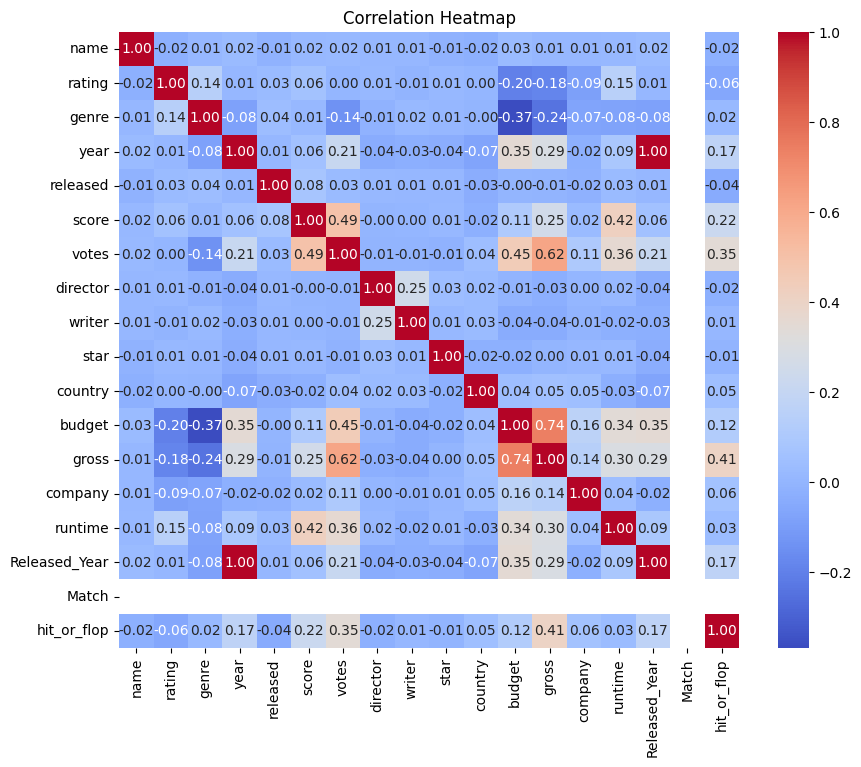

In [255]:
# Calculate the correlation matrix
correlation_matrix1 = df_numerised.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Show the heatmap
plt.show()

In [256]:
# Set the diagonal elements of the correlation matrix to NaN
np.fill_diagonal(correlation_matrix1.values, np.nan)

# Find the top 5 unique correlation pairs
unique_pairs = (correlation_matrix1.unstack().sort_values(ascending=False)
                .drop_duplicates().head(5))

print(unique_pairs)

Released_Year  year     1.000000
budget         gross    0.739160
gross          votes    0.620142
votes          score    0.493084
budget         votes    0.448118
dtype: float64


In [257]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Released_Year,Match,hit_or_flop
0,The Shining,R,Drama,1980.0,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980,False,1
1,The Blue Lagoon,R,Adventure,1980.0,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980,False,1
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980.0,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980,False,1
3,Airplane!,PG,Comedy,1980.0,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980,False,1
4,Caddyshack,R,Comedy,1980.0,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980,False,1


In [258]:
df_numerised.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Released_Year,Match,hit_or_flop
0,4068,6,6,1980.0,1178,8.4,927000.0,1625,2495,620,42,19000000.0,46998772.0,1158,146.0,0,False,1
1,3410,6,1,1980.0,1011,5.8,65000.0,1430,1020,197,43,4500000.0,58853106.0,368,104.0,0,False,1
2,3152,4,0,1980.0,1229,8.7,1200000.0,682,1616,1029,43,18000000.0,538375067.0,779,124.0,0,False,1
3,179,4,4,1980.0,1011,7.7,221000.0,802,1243,1317,43,3500000.0,83453539.0,910,88.0,0,False,1
4,634,6,4,1980.0,1053,7.3,108000.0,649,308,246,43,6000000.0,39846344.0,889,98.0,0,False,1


In [259]:
# Separate the features (X) and the target variable (y)
X = df_numerised.drop(columns=['hit_or_flop'])
y = df_numerised['hit_or_flop']

# Apply SelectKBest with the chi-squared test (adjust k as needed)
k_best = SelectKBest(score_func=chi2, k=5)  # Adjust 'k' to the desired number of features
X_best = k_best.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Create a DataFrame with the selected features
selected_features_df = X[selected_features]

# Display the selected features
print("Selected Features:")
print(selected_features_df.head())

Selected Features:
   released      votes      budget        gross  company
0      1178   927000.0  19000000.0   46998772.0     1158
1      1011    65000.0   4500000.0   58853106.0      368
2      1229  1200000.0  18000000.0  538375067.0      779
3      1011   221000.0   3500000.0   83453539.0      910
4      1053   108000.0   6000000.0   39846344.0      889


In [260]:
# Calculate the average IMDb rating for each director
director_avg_rating = df_numerised.groupby('director')['rating'].mean().reset_index()

# Define a threshold for classifying directors as successful or not
success_threshold = 6.0  # You can adjust this threshold based on your criteria

# Create a binary target variable for directors
director_avg_rating['director_success'] = (director_avg_rating['rating'] >= success_threshold).astype(int)

# Merge the director success information back into the original DataFrame
df_new = pd.merge(df_numerised, director_avg_rating[['director', 'director_success']], on='director', how='left')

# Fill missing values with 0 (not successful) for directors not in the director_avg_rating DataFrame
df_new['director_success'].fillna(0, inplace=True)

# Display the first few rows of the DataFrame with the new director_success variable
print(df_new[['director', 'rating', 'director_success']].head())


   director  rating  director_success
0      1625       6                 1
1      1430       6                 0
2       682       4                 0
3       802       4                 0
4       649       6                 0


In [261]:
df_new.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Released_Year,Match,hit_or_flop,director_success
0,4068,6,6,1980.0,1178,8.4,927000.0,1625,2495,620,42,19000000.0,46998772.0,1158,146.0,0,False,1,1
1,3410,6,1,1980.0,1011,5.8,65000.0,1430,1020,197,43,4500000.0,58853106.0,368,104.0,0,False,1,0
2,3152,4,0,1980.0,1229,8.7,1200000.0,682,1616,1029,43,18000000.0,538375067.0,779,124.0,0,False,1,0
3,179,4,4,1980.0,1011,7.7,221000.0,802,1243,1317,43,3500000.0,83453539.0,910,88.0,0,False,1,0
4,634,6,4,1980.0,1053,7.3,108000.0,649,308,246,43,6000000.0,39846344.0,889,98.0,0,False,1,0


In [262]:
# Add the "director_success" column from df_new to df
df['director_success'] = df_new['director_success']

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Released_Year,Match,hit_or_flop,director_success
0,The Shining,R,Drama,1980.0,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980,False,1,1.0
1,The Blue Lagoon,R,Adventure,1980.0,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980,False,1,0.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980.0,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980,False,1,0.0
3,Airplane!,PG,Comedy,1980.0,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980,False,1,0.0
4,Caddyshack,R,Comedy,1980.0,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980,False,1,0.0
